Kinetics Toolkit (ktk) - Getting Started Tutorial
====================================

Félix Chénier, 2020

This is the getting started tutorial for the **unstable private version**. [Switch to the public version](https://felixchenier.uqam.ca/ktk_dist/tutorials).

---------------------------

The ktk library is a Python API that aims to ease the processing of biomechanical data. Since this is an API and not a GUI, some experience in programming is required. Here is a probably non-exhaustive list of prerequesites :

- Basic python skills :
    - Variable types : bool, int, float, str, dict, list, tuple
    - Function definitions : def
- Numpy :
    - array, indexing an array, operations on arrays, etc.
- Matplotlib :
    - basic plotting functions (figure, plot)

Although there are some references to object-oriented programming (classes) and Pandas DataFrames, using ktk does not require mastering those concepts and tools.

--------------------------

[Laboratory website](https://felixchenier.uqam.ca)

[Kinetics Toolkit (ktk) website](https://felixchenier.uqam.ca/kineticstoolkit)

[API documentation](https://felixchenier.uqam.ca/ktk_dist/api)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installing" data-toc-modified-id="Installing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installing</a></span><ul class="toc-item"><li><span><a href="#Obtain-access-to-ktk" data-toc-modified-id="Obtain-access-to-ktk-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Obtain access to ktk</a></span></li><li><span><a href="#Download-and-install-git" data-toc-modified-id="Download-and-install-git-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Download and install git</a></span></li><li><span><a href="#Download-and-install-Python-and-the-required-packages" data-toc-modified-id="Download-and-install-Python-and-the-required-packages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Download and install Python and the required packages</a></span><ul class="toc-item"><li><span><a href="#Windows" data-toc-modified-id="Windows-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Windows</a></span></li><li><span><a href="#macOS" data-toc-modified-id="macOS-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>macOS</a></span></li></ul></li><li><span><a href="#Clone-ktk-from-bitbucket" data-toc-modified-id="Clone-ktk-from-bitbucket-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Clone ktk from bitbucket</a></span></li><li><span><a href="#Configure-Spyder" data-toc-modified-id="Configure-Spyder-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Configure Spyder</a></span><ul class="toc-item"><li><span><a href="#Select-the-correct-matplotlib-backend" data-toc-modified-id="Select-the-correct-matplotlib-backend-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Select the correct matplotlib backend</a></span></li><li><span><a href="#Add-the-kineticstoolkit-folder-to-the-Python-path" data-toc-modified-id="Add-the-kineticstoolkit-folder-to-the-Python-path-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Add the kineticstoolkit folder to the Python path</a></span></li></ul></li></ul></li><li><span><a href="#TimeSeries" data-toc-modified-id="TimeSeries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TimeSeries</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Properties</a></span><ul class="toc-item"><li><span><a href="#time" data-toc-modified-id="time-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>time</a></span></li><li><span><a href="#data" data-toc-modified-id="data-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>data</a></span><ul class="toc-item"><li><span><a href="#data-as-n-dimensional-arrays" data-toc-modified-id="data-as-n-dimensional-arrays-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>data as n-dimensional arrays</a></span></li></ul></li><li><span><a href="#time_info" data-toc-modified-id="time_info-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>time_info</a></span></li><li><span><a href="#data_info" data-toc-modified-id="data_info-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>data_info</a></span></li><li><span><a href="#events" data-toc-modified-id="events-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>events</a></span></li></ul></li><li><span><a href="#Using-events-to-synchronize-TimeSeries" data-toc-modified-id="Using-events-to-synchronize-TimeSeries-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using events to synchronize TimeSeries</a></span></li><li><span><a href="#Using-events-to-extract-sub-TimeSeries" data-toc-modified-id="Using-events-to-extract-sub-TimeSeries-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Using events to extract sub-TimeSeries</a></span></li><li><span><a href="#Subsetting-and-merging-timeseries" data-toc-modified-id="Subsetting-and-merging-timeseries-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Subsetting and merging timeseries</a></span></li></ul></li><li><span><a href="#Kinematics" data-toc-modified-id="Kinematics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kinematics</a></span><ul class="toc-item"><li><span><a href="#Creating-configurations-of-rigid-bodies,-virtual-markers-and-segments" data-toc-modified-id="Creating-configurations-of-rigid-bodies,-virtual-markers-and-segments-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creating configurations of rigid bodies, virtual markers and segments</a></span><ul class="toc-item"><li><span><a href="#Defining-marker-names" data-toc-modified-id="Defining-marker-names-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Defining marker names</a></span></li><li><span><a href="#Defining-rigid-body-configurations-using-a-static-acquisition" data-toc-modified-id="Defining-rigid-body-configurations-using-a-static-acquisition-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Defining rigid body configurations using a static acquisition</a></span></li><li><span><a href="#Defining-the-virtual-marker-configurations-based-on-probing-acquisitions" data-toc-modified-id="Defining-the-virtual-marker-configurations-based-on-probing-acquisitions-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Defining the virtual marker configurations based on probing acquisitions</a></span></li><li><span><a href="#Defining-segment-configurations" data-toc-modified-id="Defining-segment-configurations-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Defining segment configurations</a></span></li></ul></li><li><span><a href="#Processing-an-experimental-trial" data-toc-modified-id="Processing-an-experimental-trial-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Processing an experimental trial</a></span></li></ul></li></ul></div>

Installing
----------

Please follow these steps to install the private version of ktk.

### Obtain access to ktk ###

Please [email me](mailto:chenier.felix@uqam.ca) if you are interested to collaborate on research and/or ktk development.

### Download and install git ###

ktk is versionned using git, and includes functions to update itself. The first step to obtain ktk is to install git on your computer.

[git website](https://git-scm.com)

Just use the default checkboxes in every dialog, everything should be fine.

### Download and install Python and the required packages ###
There are many ways to do this. I recommend to install Anaconda or Miniconda, and use
conda to install the required packages.

#### Windows ####
The easiest way is to install Anaconda, then add some additional packages.

**Download and install Anaconda**

[Anaconda individual website](https://www.anaconda.com/products/individual)

**Add external dependencies**

Open the Anaconda console and type these commands to install ktk's additional dependencies:

    conda install -c conda-forge ezc3d
    conda install pytest
    
From now on, you can open Spyder by clicking on its icon in the Windows start menu.

#### macOS ####

**Download and install Anaconda or Miniconda**

[Anaconda individual website](https://www.anaconda.com/products/individual)

[Miniconda website](https://docs.conda.io/en/latest/miniconda.html)

**Create a virtual environment and install the external dependencies**

Open a terminal and type these commands to create a `ktk` virtual environment and install the dependencies in this environment. I included specific versions for some packages to help resolving some bugs with qt and matplotlib on macOS Catalina. This is still moving. Please note that an unresolved major bug exists in macOS Mojave that makes the whole session crash when using tkinter. Either upgrade to Catalina or revert to python 3.3.0.

    conda create -n ktk
    conda activate ktk
    conda install -c conda-forge python=3.7 pyqt=5.12 matplotlib=3.2 ezc3d spyder
    conda install -c conda-forge scipy pandas scikit-learn pytest jupyter

From now on, you can open Spyder by opening a terminal and writing:

	conda activate ktk
	spyder

### Clone ktk from bitbucket ###

Open Spyder, navigate to the directory where you want to install ktk (for example, F:\), and run these lines in the IPython console, replacing USERNAME with your bitbucket username.

    import os
    print('Cloning repository...')
    os.system('git clone https://USERNAME@bitbucket.org/felixchenier/kineticstoolkit.git')
    print('Pulling origin/master...')
    %cd kineticstoolkit
    os.system('git pull origin master')

### Configure Spyder ###

#### Select the correct matplotlib backend ####

In Spyder's preference, go to the **IPython console** item, then to the
**Graphics** pane. In the **Graphics backend** box, select **Qt5**.

#### Add the kineticstoolkit folder to the Python path ####

In Spyder, look for the **PYTHONPATH manager**. Open this manager and add the
`kineticstoolkit` folder that you just cloned to the python path.

Restart Spyder. Writing `import ktk` should find and import ktk.

---------------------------------------------------

Congratulation, ktk is now installed. From now on, you can always update to
the most recent version using:

    import ktk
    ktk.update()

Now we can import ktk and some other libraries used in this tutorial.

In [1]:
import ktk
import pandas as pd
import numpy as np

TimeSeries
-------------

This class is the basis of most ktk modules and is in my opinion very helpful in manipulating biomechanical data.

-------------------------

***The three roles of the TimeSeries class are to:***
1. *organize temporal data in time;*
2. *deal with events;*
3. *associate metadata to data.*

-------------------------

Although we often see the concept of time series in financial, forecast, and even psychological science, the concept of time series also applies very well to biomechanics: biomechanical data is almost always expressed as series of data in time (e.g., the trajectory of a marker, an electromyographic signal).

While in python, time series analyses are often performed using Pandas DataFrames, I believe DataFrames are suboptimal in biomechanics processing:

1. We often have to deal not just with series of data points, but also with **series of vectors** (e.g., trajectory of a marker) and **series of matrices** (e.g., series of transformation matrices). Expressing series of vectors and matrices in a bidimensional DataFrame is not convenient.

2. We often have different measures with **different units**, and there is no practical way with a DataFrame to associate units to columns, other than by keeping a separate dictionary.

3. We often deal with **events** (e.g., heel contact), and there is no practical way using a DataFrame to keep a list of those events with their corresponding times, other than by keeping a separate list.

To overcome these limitation, ktk provides the `TimeSeries` class. This class is largely inspired by Matlab's `timeseries` and `tscollection`.

To better understand the role and capabilities of the TimeSeries class, we will begin by opening some columns of a csv file as a Pandas DataFrame. This file contains forces and moments applied on an instrumented wheelchair wheel during the propulsion of a manual wheelchair.

In [2]:
# Read some columns
df = pd.read_csv('data/timeseries/smartwheel.csv',
                 usecols=[18, 19, 20, 21, 22, 23],
                 names=['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz'],
                 nrows=5000)

# Assign time to the DataFrame's index, where the sampling rate is 240 Hz.
df.index = np.arange(df.shape[0]) / 240
df

,Fx,Fy,Fz,Mx,My,Mz
0.000000,1.27,-0.89,-0.20,-0.03,0.05,-0.03
0.004167,0.49,-0.83,-0.51,0.02,-0.01,-0.13
0.008333,0.00,-0.78,-0.51,0.04,-0.07,-0.18
0.012500,-0.13,-0.93,-0.41,0.03,-0.16,-0.18
0.016667,-0.02,-0.89,0.00,0.01,-0.21,-0.13
...,...,...,...,...,...,...
20.812500,0.87,-1.73,0.00,0.08,-0.07,-0.03
20.816667,0.68,-2.38,0.20,0.07,-0.05,0.08
20.820833,0.39,-2.72,0.20,0.02,0.00,0.10
20.825000,0.32,-2.51,0.41,0.04,0.05,0.08


Now, we can convert this DataFrame to a TimeSeries:

In [3]:
ts = ktk.TimeSeries().from_dataframe(df)
ts

TimeSeries with attributes:
           data: <dict with 6 entries>,
      data_info: <dict with 0 entries>,
         events: <list of 0 items>
           time: <array of shape (5000,)>,
      time_info: <dict with 1 entries>,

### Properties ###

#### time ####

The `time` property is the time vector, which tells at which time correspond each of the samples.

In [4]:
ts.time

array([ 0.        ,  0.00416667,  0.00833333, ..., 20.82083333,
       20.825     , 20.82916667])

#### data ####

The `data` property contains the TimeSeries' data in a dictionary. Here, we had 6 columns in the DataFrame: each of these columns corresponds to a data key.

In [5]:
ts.data

{
    'Fx': <array of shape (5000,)>,
    'Fy': <array of shape (5000,)>,
    'Fz': <array of shape (5000,)>,
    'Mx': <array of shape (5000,)>,
    'My': <array of shape (5000,)>,
    'Mz': <array of shape (5000,)>
}

##### data as n-dimensional arrays #####

Up to now, there is no true benefit to using a TimeSeries instead of a DataFrame to process the forces and moments measured by the instrumented wheel. Let's see how the TimeSeries addresses point 1: **dealing with series of vectors and matrices**.

In reality, Fx, Fy and Fz are components of a single entity which is a force vector. Similarly, Mx, My and Mz are components of a single entity which is a moment vector. Let's see what happens if we name the DataFrames' columns differently.

In [6]:
df.columns = ['Forces[0]', 'Forces[1]', 'Forces[2]', 'Moments[0]', 'Moments[1]', 'Moments[2]']
df

,Forces[0],Forces[1],Forces[2],Moments[0],Moments[1],Moments[2]
0.000000,1.27,-0.89,-0.20,-0.03,0.05,-0.03
0.004167,0.49,-0.83,-0.51,0.02,-0.01,-0.13
0.008333,0.00,-0.78,-0.51,0.04,-0.07,-0.18
0.012500,-0.13,-0.93,-0.41,0.03,-0.16,-0.18
0.016667,-0.02,-0.89,0.00,0.01,-0.21,-0.13
...,...,...,...,...,...,...
20.812500,0.87,-1.73,0.00,0.08,-0.07,-0.03
20.816667,0.68,-2.38,0.20,0.07,-0.05,0.08
20.820833,0.39,-2.72,0.20,0.02,0.00,0.10
20.825000,0.32,-2.51,0.41,0.04,0.05,0.08


Now we convert this DataFrame to a TimeSeries:

In [7]:
ts = ktk.TimeSeries().from_dataframe(df)
ts.data

{
     'Forces': <array of shape (5000, 3)>,
    'Moments': <array of shape (5000, 3)>
}

We see that instead of being separated into 6 separate components, the three components of both the forces and moments are now grouped in two Nx3 arrays. This may greatly simplify subsequent data processing. For example, if we are interested in calculating the vectorial sum of the forces, then one could add this new data to the TimeSeries with this line:

In [8]:
ts.data['Ftot'] = np.sqrt(np.sum(ts.data['Forces']**2, axis=1))
ts.data

{
     'Forces': <array of shape (5000, 3)>,
       'Ftot': <array of shape (5000,)>
    'Moments': <array of shape (5000, 3)>,
}

#### time_info ####

The `time_info` property associates metadata to the time vector. It is a dictionary where each key is the name of one metadata. By default, `time_info` includes the `Unit` metadata, which corresponds to `s`. Any other metadata can be added by adding new keys in `time_info`.

In [9]:
ts.time_info

{
    'Unit': 's'
}

#### data_info ####

Similarly to `time_info`, the `data_info` property associates metadata to data. This is especially useful for addressing point 2: **dealing with several units**. This property is a dictionary of dictionaries, where the first key corresponds to the data key, and the second key is the metadata itself.

To ease the management of `data_info`, one can use the TimeSeries' `add_data_info` method.

In [10]:
ts.add_data_info('Forces', 'Unit', 'N')
ts.add_data_info('Moments', 'Unit', 'Nm')
ts.add_data_info('Ftot', 'Unit', 'N')
ts.data_info

{
     'Forces': <dict with 1 entries>,
       'Ftot': <dict with 1 entries>
    'Moments': <dict with 1 entries>,
}

In [11]:
ts.data_info['Forces']

{
    'Unit': 'N'
}

Now it is time to plot our TimeSeries, using its builtin `plot` method which makes use of `data_info` to write the data units in the legend.

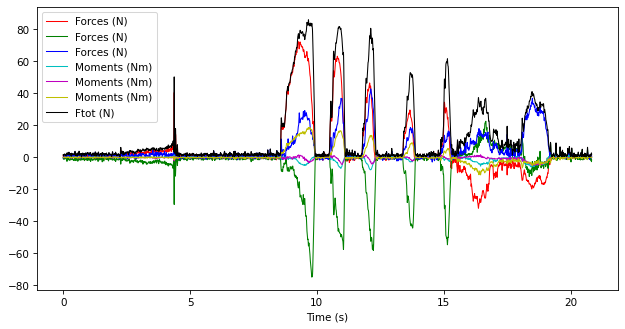

In [12]:
ts.plot()

#### events ####

Events are maybe the most interesting thing about the `TimeSeries` class. In the figure above, we clearly see that the TimeSeries consists in a series of events. A first event corresponds to a synchronization signal generated by creating an impact of the instrumented pushrim. Then, we have a series of pushes and recoveries. Although functions are implemented, for example in the `pushrimkinetics` or `cycle` submodules, to analyze signals and add events, we will start here by adding these events by hand.

In [13]:
ts.add_event(4.35, 'sync')
ts.add_event(8.56, 'push')
ts.add_event(9.93, 'recovery')
ts.add_event(10.50, 'push')
ts.add_event(11.12, 'recovery')
ts.add_event(11.78, 'push')
ts.add_event(12.33, 'recovery')
ts.add_event(13.39, 'push')
ts.add_event(13.88, 'recovery')
ts.add_event(14.86, 'push')
ts.add_event(15.30, 'recovery')

If we plot again the TimeSeries, we can see the added events.

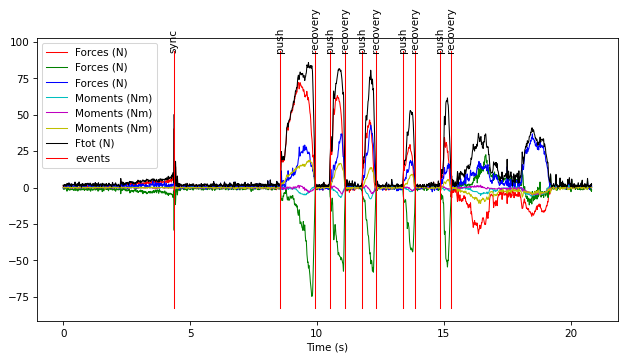

In [14]:
ts.plot(plot_event_names=True)

### Using events to synchronize TimeSeries ###

Let's see how we can make use of these events. First, the `sync` event can be used to set the zero-time, in the case where, for example, this wheel must be synchronized with another wheel, or with another instrument that also has a synchronization event. The method `sync_event` shifts the TimeSeries' time and events time so that the sync event becomes the new "zero-time".

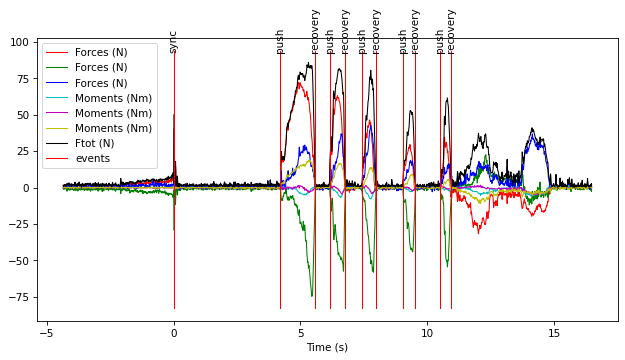

In [15]:
ts.sync_event('sync')
ts.plot(plot_event_names=True)

### Using events to extract sub-TimeSeries ###

The `TimeSeries` class comes with a myriad of methods such as `get_ts_after_event`, `get_ts_between_events`, etc. For example, if we want to analyze data of the four first pushes, and get rid of any other data, we could extract a new TimeSeries using:

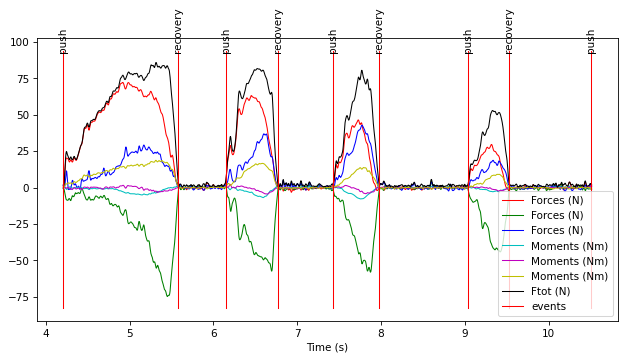

In [16]:
# Extract data push event 0 up to push event 4.
ts2 = ts.get_ts_between_events('push', 'push', 0, 4, inclusive=True)

# Remove the events that are not contained into the new time range.
ts2.trim_events()

ts2.plot(plot_event_names=True)

### Subsetting and merging timeseries ###

To process only a subset of a TimeSeries, we can use the `get_subset` method. For example, if we only want to process force information from the above TimeSeries, we could subset this TimeSeries.

In [17]:
ts3 = ts2.get_subset(['Forces', 'Ftot'])

ts3.data

{
    'Forces': <array of shape (1514, 3)>,
      'Ftot': <array of shape (1514,)>
}

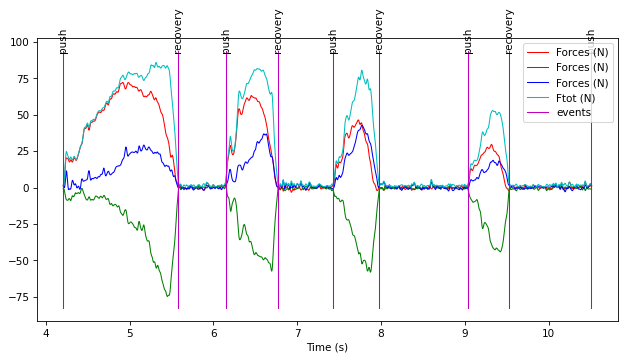

In [18]:
ts3.plot(plot_event_names=True)

Kinematics
-------------

The kinematics module allows opening trajectories of markers from c3d or n3d
files, and process those trajectory to:
- create rigid body configurations based on a static acquisitions;
- register the markers trajectories to rigid body trajectories;
- create virtual marker configuration based on probing acquisitions;
- reconstruct these virtual markers from rigid body trajectories;
- and other operations that will be implemented in the future.

Here is a quick example of how to reconstruct complete kinematics during a task, based on a static acquisition and probing acquisitions.

### Creating configurations of rigid bodies, virtual markers and segments ###


#### Defining marker names ####

The n3d file used in this example contains a series of numbered markers, but does not contain the markers names. If we had used
another system such as Optitrack or Vicon, the marker names would be included in the c3d files and this step wouldn't be required.

In [29]:
marker_names = [
    'Probe1', 'Probe2', 'Probe3', 'Probe4', 'Probe5', 'Probe6',
    'WheelchairRearR', 'WheelchairRearL', 'WheelchairFront',
    'ScapulaL1', 'ScapulaL2', 'ScapulaL3',
    'ScapulaR1', 'ScapulaR2', 'ScapulaR3',
    'Head1', 'Head2', 'Head3',
    'Sternum',
    'ArmL1', 'ArmL2', 'ArmL3',
    'LateralEpicondyleL', 'ForearmL1', 'ForearmL2', 'ForearmL3',
    'NAG',
    'GloveL1', 'GloveL2', 'GloveL3',
    'ArmR1', 'ArmR2', 'ArmR3',
    'LateralEpicondyleR', 'ForearmR1', 'ForearmR2', 'ForearmR3',
    'NAR',
    'GloveR1', 'GloveR2', 'GloveR3']

#### Defining rigid body configurations using a static acquisition ####

One of the aims of the static trial is to have a sample where every marker is visible. We use this trial to define the rigid body configuration. A rigid body configuration is a list of markers that form a rigid body, along with their local position in the rigid body's reference frame.

For this example, we will create rigid bodies for the markers triads 'ArmR' and 'ForearmR'.

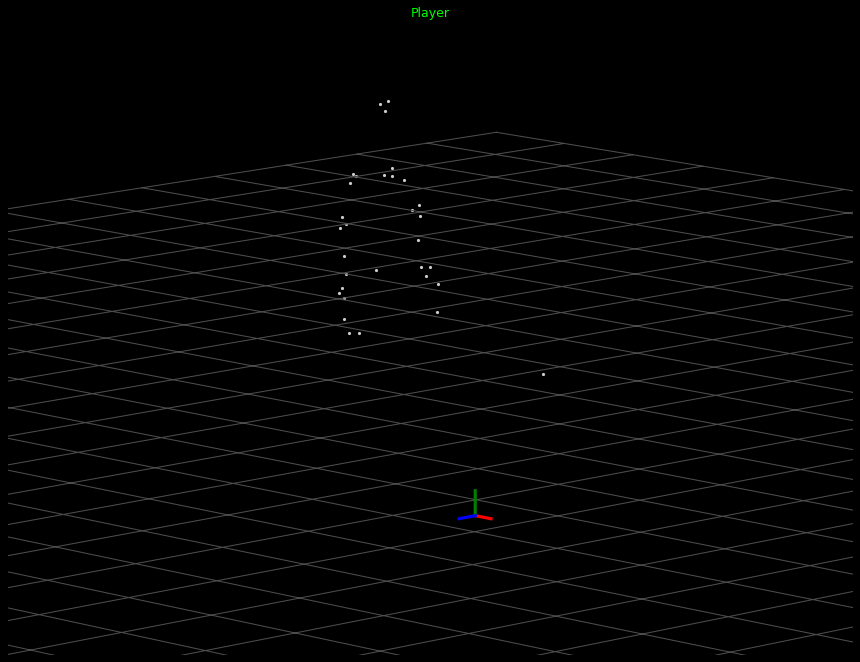

In [41]:
config = dict()                 # Will contain all configuration data.
config['RigidBodies'] = dict()  # Will contain all rigid body configurations.

# Read the static trial
markers = ktk.kinematics.read_n3d_file('data/kinematics/sample_static.n3d',
                                       labels=marker_names)

# Show this trial, just to inspect it
ktk.Player(markers=markers, zoom=2, azimuth=0.8, elevation=0.16,
           translation=(0.2, -0.7))

In [42]:
# Create the rigid body configurations
config['RigidBodies']['ArmR'] = ktk.kinematics.create_rigid_body_config(
        markers, ['ArmR1', 'ArmR2', 'ArmR3'])

config['RigidBodies']['ForearmR'] = ktk.kinematics.create_rigid_body_config(
        markers, ['ForearmR1', 'ForearmR2', 'ForearmR3'])

The probe's rigid body configuration is created manually from its specifications. Each local point is expressed relative to a reference frame that is centered at the probe's tip.

In [43]:
config['RigidBodies']['Probe'] = {
        'MarkerNames': ['Probe1', 'Probe2', 'Probe3',
                        'Probe4', 'Probe5', 'Probe6'],
        'LocalPoints': np.array([[
                [2.1213,   2.1213,  2.0575,   2.1213,   1.7070,   1.7762],
                [-15.8328, 15.8508, 16.0096,  16.1204,  -15.5780, -15.6057],
                [86.4285,  86.4285, 130.9445, 175.4395, 175.3805, 130.8888],
                [1000,     1000,    1000,     1000,     1000,     1000]]]
                ) / 1000
        }

#### Defining the virtual marker configurations based on probing acquisitions ####

In [44]:
config['VirtualMarkers'] = dict()  # Will contain all virtual marker configurations

Since this is a repetitive operation, we will create a new function that will be called for each virtual marker:

In [45]:
def process_probing_acquisition(file_name, rigid_body_name):

    # Load the markers
    markers = ktk.kinematics.read_n3d_file(file_name, labels=marker_names)

    # Calculate rigid body trajectories using these markers
    rigid_bodies = ktk.kinematics.register_markers(markers,
                                                   config['RigidBodies'])

    # Add the marker 'ProbeTip' in markers. This is the origin of the Probe
    # rigid body.
    markers.data['ProbeTip'] = rigid_bodies.data['Probe'][:, :, 3]
    markers.add_data_info('ProbeTip', 'Color', 'r')

    # Create the marker configuration
    return ktk.kinematics.create_virtual_marker_config(
            markers, rigid_bodies, 'ProbeTip', rigid_body_name)

Now, we can process every probing acquisition.

In [46]:
config['VirtualMarkers']['AcromionR'] = process_probing_acquisition(
        'data/kinematics/sample_probing_acromion_R.n3d', 'ArmR')

config['VirtualMarkers']['MedialEpicondyleR'] = process_probing_acquisition(
        'data/kinematics/sample_probing_medial_epicondyle_R.n3d', 'ArmR')

config['VirtualMarkers']['OlecraneR'] = process_probing_acquisition(
        'data/kinematics/sample_probing_olecrane_R.n3d', 'ForearmR')

config['VirtualMarkers']['RadialStyloidR'] = process_probing_acquisition(
        'data/kinematics/sample_probing_radial_styloid_R.n3d', 'ForearmR')

config['VirtualMarkers']['UlnarStyloidR'] = process_probing_acquisition(
        'data/kinematics/sample_probing_ulnar_styloid_R.n3d', 'ForearmR')

#### Defining segment configurations ####

This step is purely for visualization. Here, we define different segments
that will be shown in the Player.

In [47]:
config['Segments'] = dict()  # Will contain all segment definitions

config['Segments']['ArmR'] = {
        'Color': [1, 0.25, 0],
        'Links': [['AcromionR', 'MedialEpicondyleR'],
                  ['AcromionR', 'LateralEpicondyleR'],
                  ['AcromionR', 'OlecraneR']]
        }

config['Segments']['ForearmR'] = {
        'Color': [1, 0.5, 0],
        'Links': [['MedialEpicondyleR', 'RadialStyloidR'],
                  ['MedialEpicondyleR', 'UlnarStyloidR'],
                  ['LateralEpicondyleR', 'RadialStyloidR'],
                  ['LateralEpicondyleR', 'UlnarStyloidR'],
                  ['OlecraneR', 'RadialStyloidR'],
                  ['OlecraneR', 'UlnarStyloidR'],
                  ['UlnarStyloidR', 'RadialStyloidR']]
        }

### Processing an experimental trial ###

Now that we configured the rigid bodies and the virtual markers, we are ready to load an experimental trial, calculate the rigid body trajectories and recreate the virtual markers using these rigid bodies.

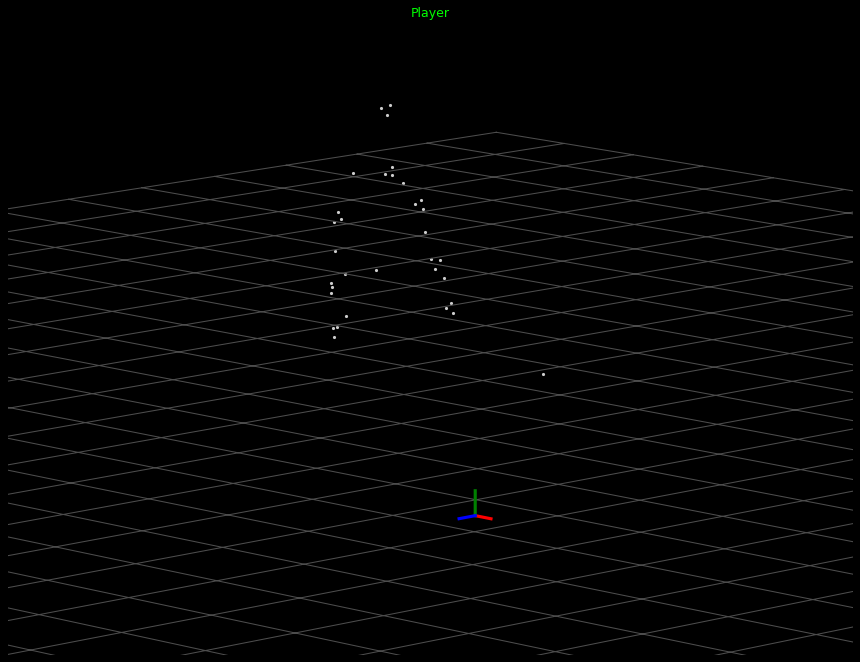

In [48]:
# Load the markers of the experimental trial
markers = ktk.kinematics.read_n3d_file(
        'data/kinematics/sample_propulsion.n3d', labels=marker_names)

# Show those markers in a player
ktk.Player(markers=markers, zoom=2, azimuth=0.8, elevation=0.16,
           translation=(0.2, -0.7))

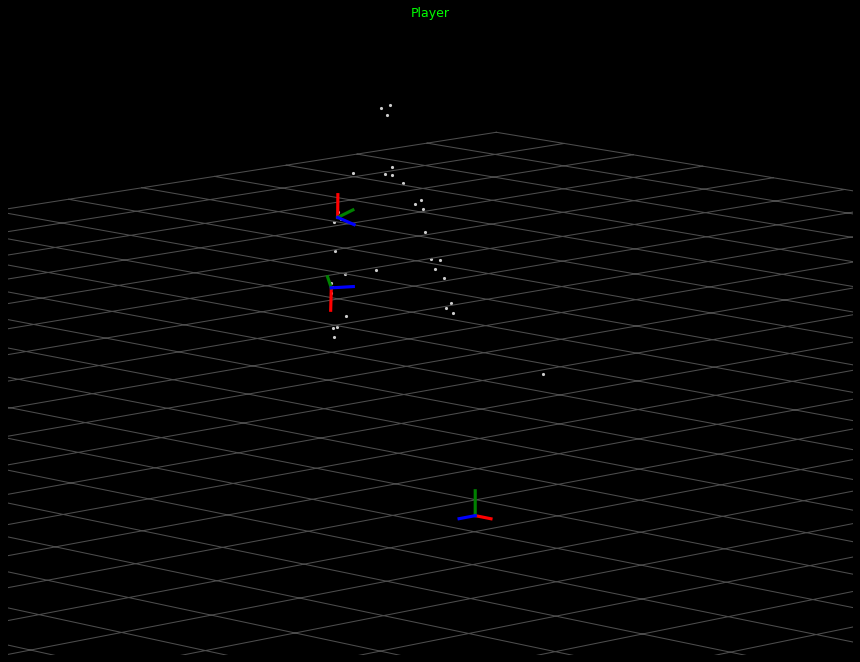

In [49]:
# Compute the rigid body trajectories
rigid_bodies = ktk.kinematics.register_markers(markers, config['RigidBodies'])

# Show those rigid bodies and markers in a player
ktk.Player(markers=markers, rigid_bodies=rigid_bodies,
           zoom=2, azimuth=0.8, elevation=0.16, translation=(0.2, -0.7))

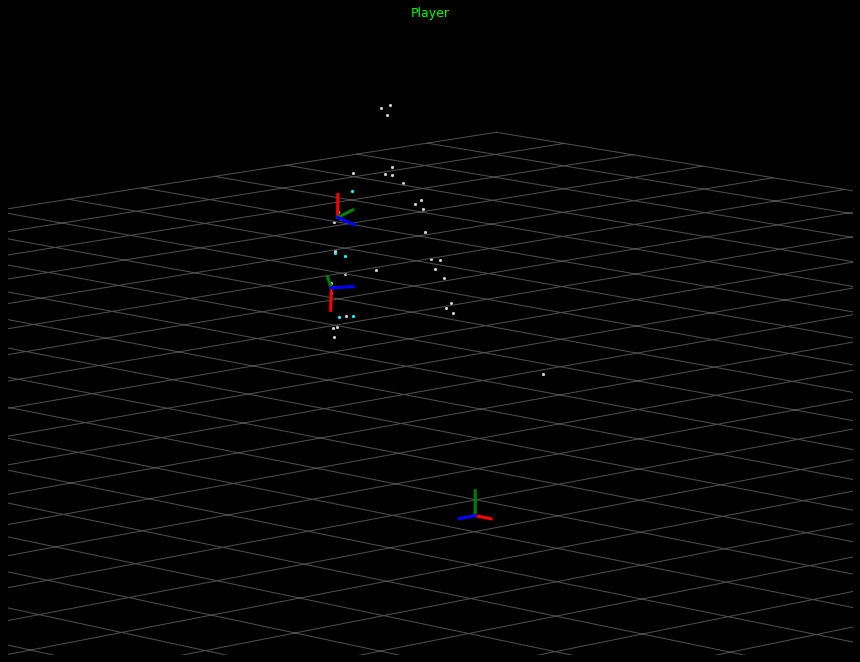

In [50]:
# Add the virtual markers

for virtual_marker in config['VirtualMarkers']:
    local_coordinates = config['VirtualMarkers'][virtual_marker]['LocalPoint']
    rigid_body_name = config['VirtualMarkers'][virtual_marker]['RigidBodyName']
    reference_frame = rigid_bodies.data[rigid_body_name]

    markers.data[virtual_marker] = ktk.geometry.get_global_coordinates(
            local_coordinates, reference_frame)

    # Assign a color for these virtual markers
    markers.add_data_info(virtual_marker, 'Color', 'c')

# Show the markers and rigid bodies in a player
ktk.Player(markers=markers, rigid_bodies=rigid_bodies,
           zoom=2, azimuth=0.8, elevation=0.16, translation=(0.2, -0.7))

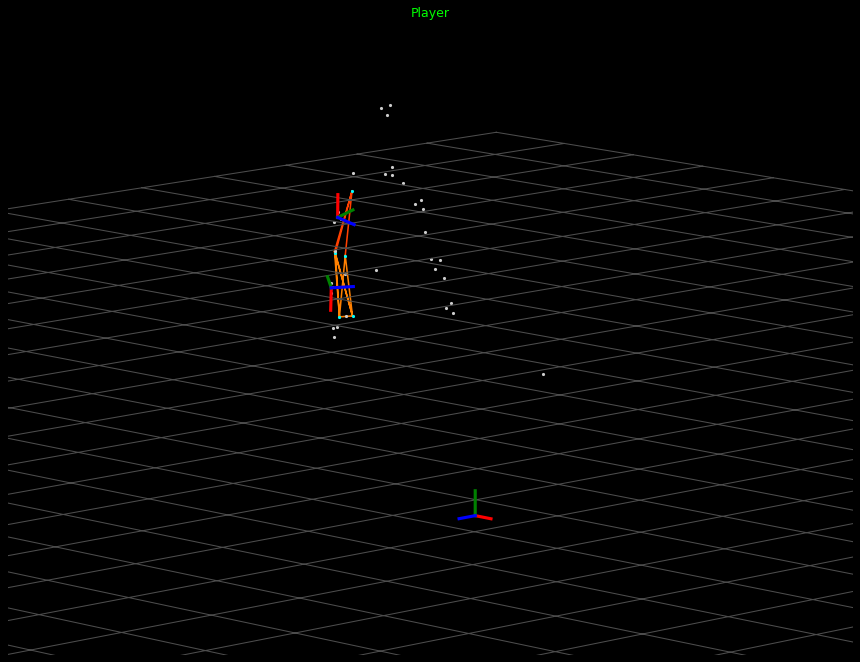

In [51]:
# Add the segments
ktk.Player(markers=markers, rigid_bodies=rigid_bodies,
           segments=config['Segments'], zoom=2, azimuth=0.8, elevation=0.16,
           translation=(0.2, -0.7))